In [ ]:
# Keras Regression

# Part 1:  Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
#Read data
df = pd.read_csv('C:/Users/rumma/Desktop/NeuralNetworkPractice/Jose_DL_Bootcamp_TF_2_Notebooks_and_Data/DATA/kc_house_data.csv')
print(df)

In [7]:
#Exploratory analysis
df.isnull().sum()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# Part 2: Exploratory data analysis (EDA)
Goal is to understand which variables are important, view summary statisticsand visualize the data

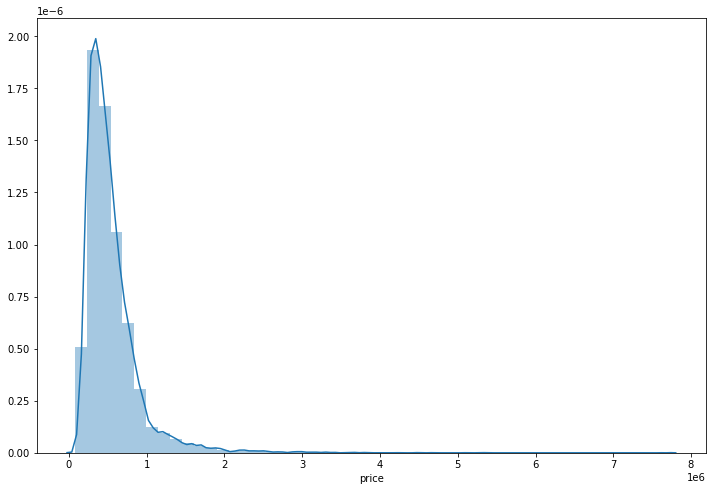

In [8]:
plt.figure(figsize=(12,6))
sns.distplot(df['price'])

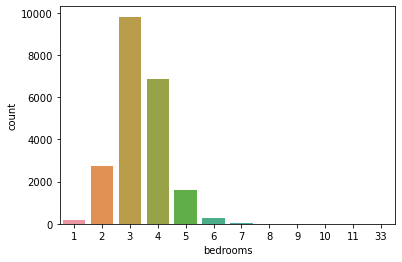

In [9]:
sns.countplot(df['bedrooms'])

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


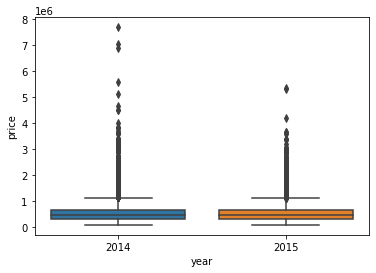

In [12]:
#Feature Engineering from Date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
sns.boxplot(x='year',y='price',data=df)

# Part 3 - Data Preprocessing

In [19]:
dataset = pd.read_csv('C:/Users/rumma/Desktop/NeuralNetworkPractice/ANNClassification_Udemy/Churn_Modelling.csv')
# Importing dataset
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [21]:
# Encoding categorical data: 
# 1. Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

# 2. One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 4 - Building the ANN

In [28]:
# Initializing the ANN
ann=tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 4 - Training the ANN

In [30]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5848 - accuracy: 0.7961
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7931
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7921
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8018
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8056
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8149
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8208
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8163
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4163 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3305 - accuracy: 0.8694
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8657
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8644
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8646
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8640
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8581
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8636
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8614
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8617
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 

# Part 5 - Making the predictions and evaluating the model
Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

So, should we say goodbye to that customer?

In [31]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


In [33]:
# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[1513   82]
 [ 187  218]]


0.8655